In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, HistGradientBoostingClassifier 
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor, BaggingRegressor, HistGradientBoostingRegressor 
from sklearn.ensemble import VotingClassifier, StackingClassifier, StackingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, cross_validate
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error
import sklearn
# Modelo de validación cruzada con valor cruzado estratificado Kfold
kfold = StratifiedKFold(n_splits=5)

**Monitoreo de condición de sistemas hidráulicos Conjunto de datos**

In [109]:
from google.colab import files 
uploaded= files.upload ()

Saving dataset.csv to dataset (6).csv


In [110]:
data=pd.read_csv("dataset.csv",delimiter=";")
data # Llamo la base de datos, en este caso le agrego nombres.

,ID,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,FR,OR,RR,BR,MR,CR,Green frogs
0,1,A1,600,1,1,4,6,2,10,0,0,50,0,0,0,1,0
1,2,A1,700,1,5,1,10,6,10,3,1,75,1,1,0,1,0
2,3,A1,200,1,5,1,10,6,10,3,4,75,1,1,0,1,0
3,4,A1,300,1,5,0,6,10,2,3,4,25,0,0,0,1,0
4,5,A1,600,2,1,4,10,2,6,0,0,99,0,5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,185,S52,2300,1,12,3,2,2,1,0,0,75,2,1,0,1,0
185,186,S52,300,1,14,2,7,10,2,0,0,100,5,5,0,1,1
186,187,S52,500,1,1,4,1,10,2,0,0,100,5,5,0,1,1
187,188,S52,300,1,12,3,2,1,6,0,0,100,1,0,0,1,0


In [111]:
data=data.drop(columns=["ID","Motorway","SR"]) # Eliminar columnas

In [112]:
data # Lectura de datos
data.head(5) # Observar las primeras filas de mi data

,NR,TR,VR,SUR1,SUR2,SUR3,UR,FR,OR,RR,BR,MR,CR,Green frogs
0,1,1,4,6,2,10,0,0,50,0,0,0,1,0
1,1,5,1,10,6,10,3,1,75,1,1,0,1,0
2,1,5,1,10,6,10,3,4,75,1,1,0,1,0
3,1,5,0,6,10,2,3,4,25,0,0,0,1,0
4,2,1,4,10,2,6,0,0,99,0,5,0,1,0


In [113]:
data.describe() # Estadística descriptiva

,NR,TR,VR,SUR1,SUR2,SUR3,UR,FR,OR,RR,BR,MR,CR,Green frogs
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.00000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,1.566138,4.952381,1.904762,4.232804,5.391534,5.84127,0.841270,0.846561,89.962963,2.333333,2.502646,0.047619,1.015873,0.571429
std,1.544419,5.590918,1.317407,3.434615,3.515185,3.29348,1.315291,1.349843,19.904926,2.520132,2.640971,0.296894,0.125316,0.496186
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.00000,0.000000,0.000000,25.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,2.000000,2.000000,2.00000,0.000000,0.000000,99.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,2.000000,2.000000,6.000000,6.00000,0.000000,0.000000,100.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,12.000000,3.000000,7.000000,9.000000,9.00000,3.000000,2.000000,100.000000,5.000000,5.000000,0.000000,1.000000,1.000000
max,12.000000,15.000000,4.000000,14.000000,11.000000,11.00000,3.000000,4.000000,100.000000,10.000000,10.000000,2.000000,2.000000,1.000000


In [114]:
# Detección de valores atípicos
from collections import Counter
def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # Iterar sobre características (columnas)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # Paso atípico
        outlier_step = 1.5 * IQR
        
        # Determinar una lista de índices de valores atípicos para la característica col.
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # Agregar los índices de valores atípicos encontrados para col a la lista de índices de valores atípicos
        outlier_indices.extend(outlier_list_col)
        
    # Seleccionar observaciones que contengan más de 2 valores atípicos
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers

In [115]:
# Detectar valores atípicos de Age, SibSp, Parch y Fare
Outliers_to_drop = detect_outliers(data.select_dtypes(include=np.number),2,data.select_dtypes(include=np.number).columns[:-1])

In [201]:
data.loc[Outliers_to_drop] # Mostrar las filas de valores atípicos

,NR,TR,VR,SUR1,SUR2,SUR3,UR,FR,OR,RR,BR,MR,CR,Green frogs
155,1,15,1,1,1,6,0,0,100,1,1,2,1,0


In [117]:
# Eliminar valores atípicos
data= data.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)
data

,NR,TR,VR,SUR1,SUR2,SUR3,UR,FR,OR,RR,BR,MR,CR,Green frogs
0,1,1,4,6,2,10,0,0,50,0,0,0,1,0
1,1,5,1,10,6,10,3,1,75,1,1,0,1,0
2,1,5,1,10,6,10,3,4,75,1,1,0,1,0
3,1,5,0,6,10,2,3,4,25,0,0,0,1,0
4,2,1,4,10,2,6,0,0,99,0,5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,1,12,3,2,2,1,0,0,75,2,1,0,1,0
184,1,14,2,7,10,2,0,0,100,5,5,0,1,1
185,1,1,4,1,10,2,0,0,100,5,5,0,1,1
186,1,12,3,2,1,6,0,0,100,1,0,0,1,0


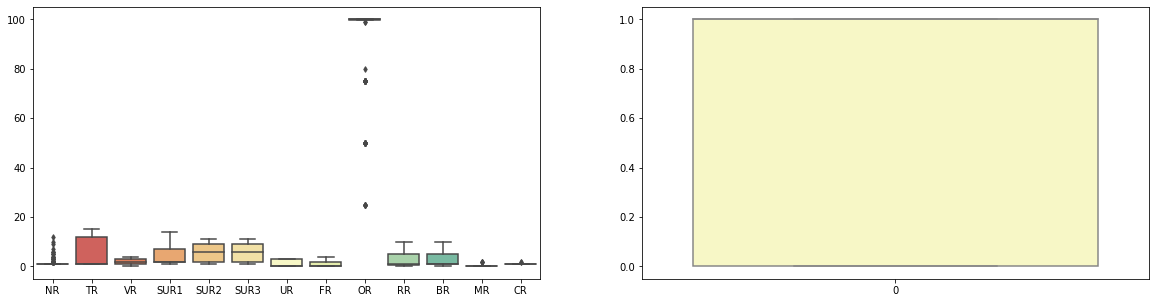

In [118]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sb.boxplot(data=data[data.columns[:-1]],fliersize=4,palette="Spectral")
plt.subplot(122)
sb.boxplot(data=data["Green frogs"],fliersize=4,palette="Spectral") # Variable predictora

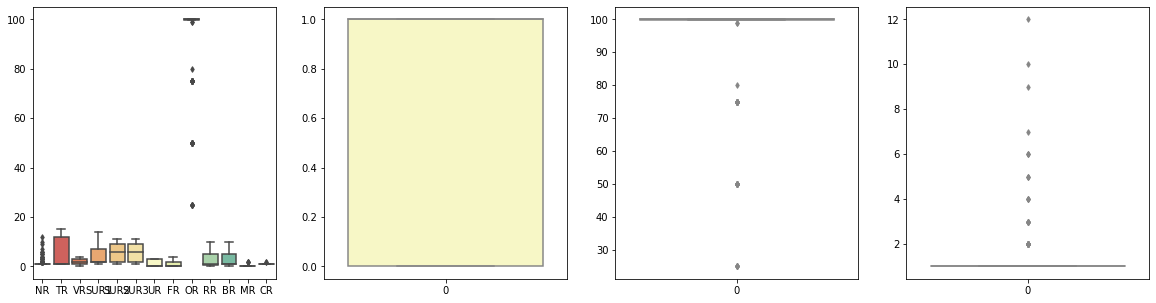

In [119]:
plt.figure(figsize=(20,5))
plt.subplot(141)
sb.boxplot(data=data[data.columns[:-1]],fliersize=4,palette="Spectral")
plt.subplot(142)
sb.boxplot(data=data["Green frogs"],fliersize=4,palette="Spectral") # Variable predictora
plt.subplot(143)
sb.boxplot(data=data["OR"],fliersize=4,palette="Spectral")
plt.subplot(144)
sb.boxplot(data=data["NR"],fliersize=4,palette="Spectral")
plt.show()

In [120]:
# Eliminar valores atípicos
data = data.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)
data

,NR,TR,VR,SUR1,SUR2,SUR3,UR,FR,OR,RR,BR,MR,CR,Green frogs
0,1,1,4,6,2,10,0,0,50,0,0,0,1,0
1,1,5,1,10,6,10,3,1,75,1,1,0,1,0
2,1,5,1,10,6,10,3,4,75,1,1,0,1,0
3,1,5,0,6,10,2,3,4,25,0,0,0,1,0
4,2,1,4,10,2,6,0,0,99,0,5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,1,12,3,2,2,1,0,0,75,2,1,0,1,0
183,1,14,2,7,10,2,0,0,100,5,5,0,1,1
184,1,1,4,1,10,2,0,0,100,5,5,0,1,1
185,1,12,3,2,1,6,0,0,100,1,0,0,1,0


In [121]:
# Rellene los valores vacíos y NaNs con NaN
data=data.fillna(np.nan)
# Comprobar valores nulos
data.isnull().sum()

NR             0
TR             0
VR             0
SUR1           0
SUR2           0
SUR3           0
UR             0
FR             0
OR             0
RR             0
BR             0
MR             0
CR             0
Green frogs    0
dtype: int64

In [122]:
# Resumen y estadísticas (otra vez)
data.describe()

,NR,TR,VR,SUR1,SUR2,SUR3,UR,FR,OR,RR,BR,MR,CR,Green frogs
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,1.572193,4.994652,1.898396,4.262032,5.411765,5.844920,0.850267,0.855615,90.122995,2.342246,2.518717,0.042781,1.010695,0.566845
std,1.551578,5.605774,1.322001,3.440868,3.518992,3.310543,1.319432,1.354208,19.781627,2.531624,2.650507,0.290140,0.103139,0.496842
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,25.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,99.500000,0.500000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,2.000000,2.000000,6.000000,6.000000,0.000000,0.000000,100.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,12.000000,3.000000,7.000000,9.000000,9.000000,3.000000,2.000000,100.000000,5.000000,5.000000,0.000000,1.000000,1.000000
max,12.000000,15.000000,4.000000,14.000000,11.000000,11.000000,3.000000,4.000000,100.000000,10.000000,10.000000,2.000000,2.000000,1.000000


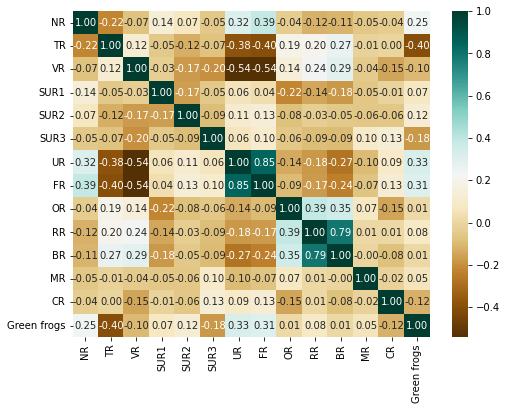

In [123]:
# Matriz de correlación entre valores numéricos
plt.figure(figsize=(8,6))
g = sb.heatmap(data.corr(),annot=True, fmt = ".2f", cmap = "BrBG")
plt.show()

<Figure size 360x216 with 0 Axes>

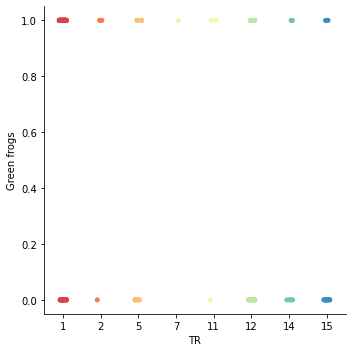

In [129]:
plt.figure(figsize=(5,3)) # Me indica si la variablke en cuestión es buena clasificando por si sola.
g = sb.catplot(x="TR",y="Green frogs",data=data.round(1),kind="strip",height=5,aspect=1,palette="Spectral")
plt.show()

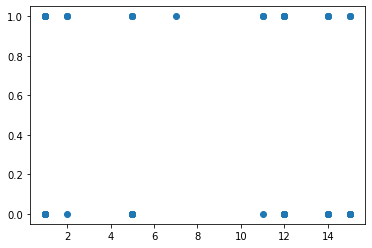

In [131]:
plt.scatter(data["TR"],data["Green frogs"])
plt.show()

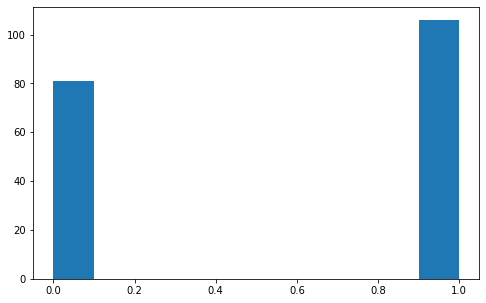

In [133]:
plt.figure(figsize=(8,5))
plt.hist(data["Green frogs"])
plt.show()

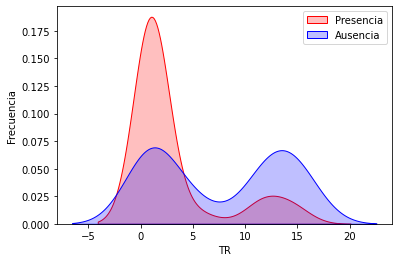

In [135]:
# Explorar la distribución por presencia o ausencia de ranas verdes
g=sb.kdeplot(data["TR"][(data["Green frogs"]==1)],color="Red",shade=True)
g=sb.kdeplot(data["TR"][(data["Green frogs"]==0)],color="Blue",shade=True)
g.set_xlabel("TR")
g.set_ylabel("Frecuencia")
g=g.legend(["Presencia","Ausencia"])

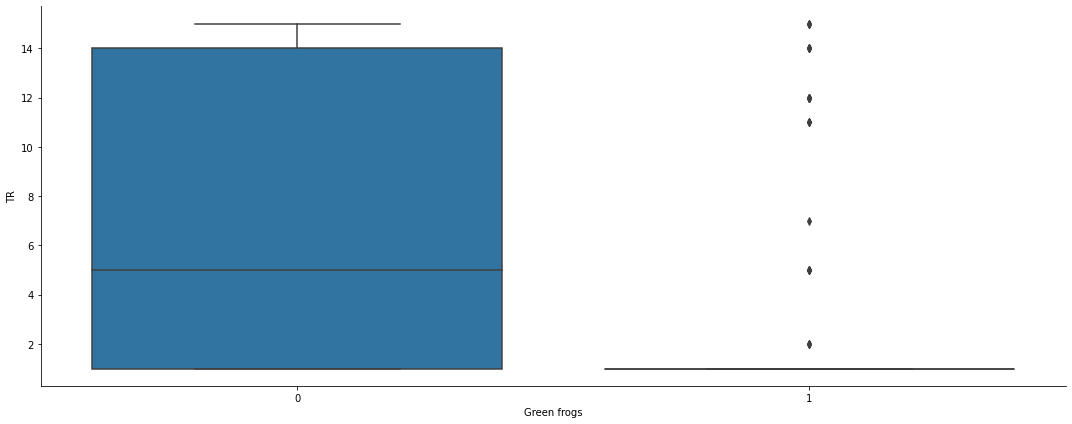

In [137]:
g=sb.catplot(x="Green frogs",y="TR",data=data,kind="box",height=6,aspect=2.5)

**MODELACIÓN**

In [144]:
X=data.drop(columns="Green frogs")
y=data["Green frogs"] # Predictores
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1432)# Lo que quieres predecir

In [145]:
print(sorted(sklearn.metrics.SCORERS.keys()))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'top_k_accuracy', 'v_measure_score']


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without a

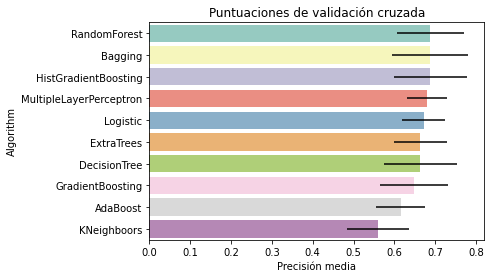

In [150]:
#  Paso de modelado Probar diferentes algoritmos
random_state = None
classifiers = []
classifiers.append(RandomForestClassifier(random_state=random_state)) # Algoritmos de clasificación
classifiers.append(AdaBoostClassifier(random_state=random_state,learning_rate=0.1))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(BaggingClassifier(random_state=random_state))
classifiers.append(HistGradientBoostingClassifier(random_state=random_state))
classifiers.append(LogisticRegression(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))

cv_results, cv_results2 = [], []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier,X_train,y=y_train,scoring="accuracy",cv=kfold,n_jobs=4))
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    cv_results2.append(accuracy_score(y_pred,y_test))

cv_means = []
cv_std = []
cv_acc = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors":cv_std,"Accuracy":cv_results2,
                       "Algorithm":["RandomForest","AdaBoost","GradientBoosting","ExtraTrees","Bagging","HistGradientBoosting",
                                    "Logistic","KNeighboors","DecisionTree","MultipleLayerPerceptron"]})
cv_res=cv_res.sort_values(by="CrossValMeans",ascending=False)
g = sb.barplot("CrossValMeans","Algorithm",data=cv_res,palette="Set3",orient="h",**{'xerr':cv_std})
g.set_xlabel("Precisión media")
g = g.set_title("Puntuaciones de validación cruzada")

Se logra evidenciar que podemos elegir los clasificadores RandomForest, Bagging, HistGradientBoosting y MultipleLayerPerceptron; debido a que sus precisiones están dentro de las mejores estadísticamente hablando. 

In [147]:
cv_res # Accuracy=presición

,CrossValMeans,CrossValerrors,Accuracy,Algorithm
0,0.696,0.074189,0.645161,RandomForest
5,0.688,0.064000,0.629032,HistGradientBoosting
4,0.672,0.099277,0.564516,Bagging
6,0.672,0.089084,0.693548,Logistic
2,0.664,0.078384,0.596774,GradientBoosting
3,0.648,0.053066,0.645161,ExtraTrees
8,0.648,0.064000,0.645161,DecisionTree
9,0.632,0.085417,0.709677,MultipleLayerPerceptron
1,0.624,0.082365,0.661290,AdaBoost
7,0.560,0.083905,0.612903,KNeighboors


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


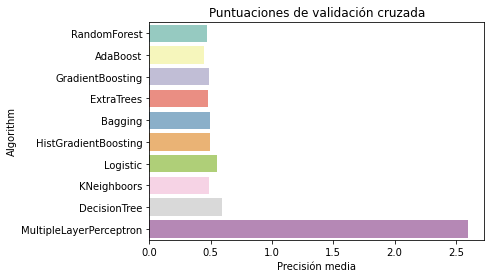

In [149]:
#  Paso de modelado Probar diferentes algoritmos
random_state = None
classifiers = []
classifiers.append(RandomForestRegressor(random_state=random_state)) # Algoritmos de regresión 
classifiers.append(AdaBoostRegressor(random_state=random_state,learning_rate=0.1))
classifiers.append(GradientBoostingRegressor(random_state=random_state))
classifiers.append(ExtraTreesRegressor(random_state=random_state))
classifiers.append(BaggingRegressor(random_state=random_state))
classifiers.append(HistGradientBoostingRegressor(random_state=random_state))
classifiers.append(LogisticRegression(random_state=random_state))
classifiers.append(KNeighborsRegressor())
classifiers.append(DecisionTreeRegressor(random_state=random_state))
classifiers.append(MLPRegressor(random_state=random_state))

cv_results, cv_results2 = [], []
for classifier in classifiers:
    cv_results.append(cross_validate(classifier,X_train,y_train,cv=7,scoring="r2",n_jobs=-1))
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    cv_results2.append(np.sqrt(mean_squared_error(y_pred,y_test)))
    cv_results.append(cv_results)

cv_res = pd.DataFrame({"RMSE":cv_results2,
                       "Algorithm":["RandomForest","AdaBoost","GradientBoosting","ExtraTrees","Bagging","HistGradientBoosting",
                                    "Logistic","KNeighboors","DecisionTree","MultipleLayerPerceptron"]})
#cv_res=cv_res.sort_values(by="CrossValMeans",ascending=False)
g = sb.barplot("RMSE","Algorithm",data=cv_res,palette="Set3",orient="h")
g.set_xlabel("Precisión media")
g = g.set_title("Puntuaciones de validación cruzada")

En cuanto a los algoritmos de regresión contamos con evidencia estadística de que los mas factibles serian MultipleLayerPerceptron, Logistic y DecisionTree. 

In [153]:
# Debido a que el problema a resolver es de clasificación nos quedamos con los que tienen mejor predición, siendo estos. 
RFC = RandomForestClassifier() 
RFC.fit(X_train,y_train)

Bag= BaggingClassifier()
Bag.fit(X_train,y_train)

HGBC = HistGradientBoostingClassifier()
HGBC.fit(X_train,y_train)

MLPC = MLPClassifier()
MLPC.fit(X_train,y_train)

pred_RFC=RFC.predict(X_test)
pred_Bag=Bag.predict(X_test)
pred_HGBC=HGBC.predict(X_test)
pred_MLPC=MLPC.predict(X_test)

In [154]:
for i,j in zip([pred_RFC,pred_Bag,pred_HGBC,pred_MLPC],["RFC","Bag","HGBC","MLPC"]):
    print("RMSE for ",j,"is ",np.sqrt(mean_squared_error(i,y_test)))

RMSE for  RFC is  0.5819876952473779
RMSE for  Bag is  0.672021505032247
RMSE for  HGBC is  0.6090712125322324
RMSE for  MLPC is  0.7828813612588127


A partir de lo anterior observamos que el mejor RMSE es RandomForestClassifier debido a que presenta el más bajo 0.58.

In [170]:
#voting : {'hard', 'soft'}
votingC = VotingClassifier(estimators=[('rfc', RFC),('bag', Bag),('MLPC',MLPC),('hgbc',HGBC)], voting='soft', n_jobs=4)
votingC = votingC.fit(X_train, y_train)
Greenfrogs_predicted_All_Voting = votingC.predict(X_test)

In [171]:
print("RMSE for Voting is ",np.sqrt(mean_squared_error(Greenfrogs_predicted_All_Voting,y_test))) # Error cuadratico medio

RMSE for Voting is  0.5956833971812706


In [172]:
# Stack_method : {'auto', 'predict_proba', 'decision_function', 'predict'}
stackingC = StackingClassifier(estimators=[('rfc', RFC),('bag', Bag),('MLPC',MLPC),('hgbc',HGBC)], stack_method='auto', n_jobs=4)
stackingC = stackingC.fit(X_train, y_train)
Greenfrogs_predicted_All_Stacking = stackingC.predict(X_test)

In [173]:
print("RMSE for Stacking is ",np.sqrt(mean_squared_error(Greenfrogs_predicted_All_Stacking,y_test)))

RMSE for Stacking is  0.6090712125322324


In [174]:
def rmse(dat):
    return np.sqrt(mean_squared_error(dat,y_test))
resultados=pd.DataFrame()
resultados["Modelo"]=["RFC","Bag","MLPC","HGBC","Voting","Stacking"]
resultados["RMSE"]=[rmse(pred_RFC),rmse(pred_Bag),rmse(pred_MLPC),rmse(pred_HGBC),rmse(Greenfrogs_predicted_All_Voting),rmse(Greenfrogs_predicted_All_Stacking)]

In [175]:
resultados.T

,0,1,2,3,4,5
Modelo,RFC,Bag,MLPC,HGBC,Voting,Stacking
RMSE,0.581988,0.672022,0.782881,0.609071,0.595683,0.609071


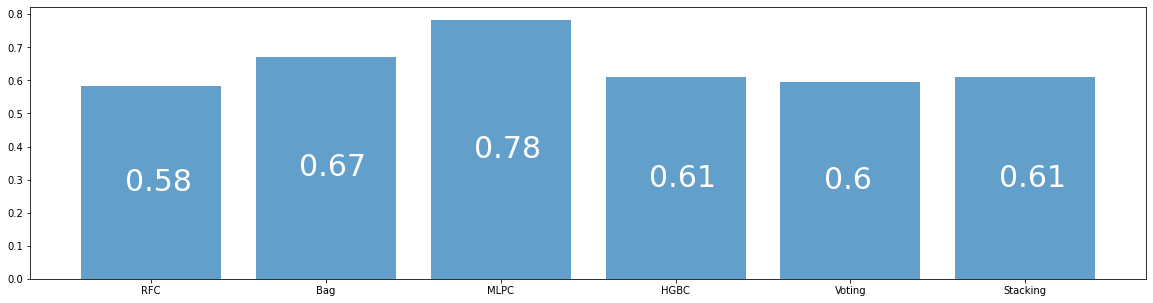

In [200]:
plt.figure(figsize=(20,5))
plt.bar(resultados["Modelo"],resultados["RMSE"],alpha=0.7)
for i,j in enumerate(resultados["RMSE"]):
    plt.text(i-0.15,j/2,np.round(j,2),ma="center",va="center",fontsize=30,c="w")
plt.xticks(np.arange(0,6,1),resultados["Modelo"])

plt.show()

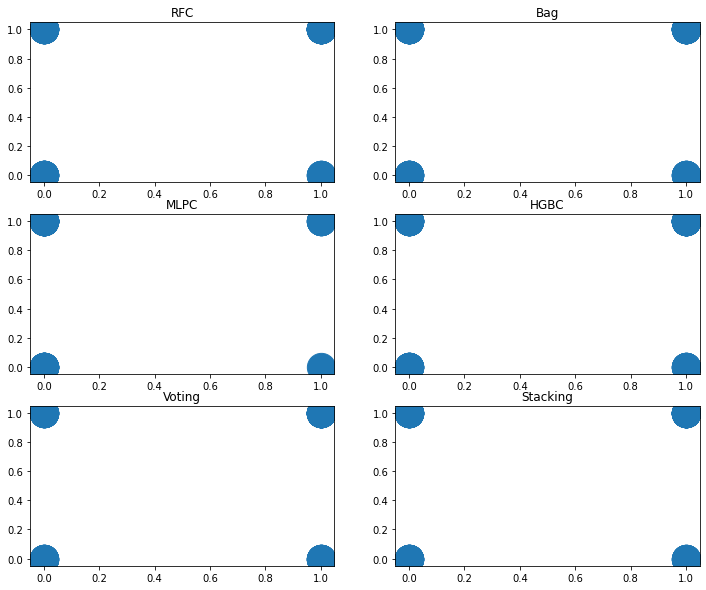

In [181]:
plt.figure(figsize=(12,10))
for i,j,k in zip([pred_RFC,pred_Bag,pred_MLPC,pred_HGBC,Greenfrogs_predicted_All_Voting,Greenfrogs_predicted_All_Stacking],["RFC","Bag","MLPC","HGBC","Voting","Stacking"],[1,2,3,4,5,6]):
    plt.subplot(3,2,k)
    plt.scatter(i,y_test, label=j, s=800)
    plt.title(j)
plt.show()

In [182]:
pred_Bag

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [184]:
results=pd.DataFrame({"RF":pred_RFC,"Bag":pred_Bag,"HGBC":pred_HGBC,"MPL":pred_MLPC,"Voting":Greenfrogs_predicted_All_Voting,"Stracking":Greenfrogs_predicted_All_Stacking,"Orig":y_pred})

In [185]:
results

,RF,Bag,HGBC,MPL,Voting,Stracking,Orig
0,1,1,1,0,1,1,1
1,1,1,0,0,1,1,1
2,0,0,1,0,1,0,1
3,0,0,0,0,0,0,0
4,1,0,1,0,1,1,1
...,...,...,...,...,...,...,...
57,0,0,0,0,0,0,1
58,1,1,1,1,0,1,0
59,1,0,1,0,1,1,1
60,0,0,0,0,0,0,0


In [191]:
for i in results.columns[:-1]:
  print(i,round(np.count_nonzero(results[i]==results["Orig"])/62*100))

RF 82
Bag 74
HGBC 85
MPL 42
Voting 84
Stracking 82
